In [11]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Load One-Hot Encoded Excel Data
file_path = r"C:\Users\keo\Downloads\Data_mine\one_hot_encoded_data_oneZero_2.0.xlsx"  # Change this to your actual file path
df = pd.read_excel(file_path)

# Ensure all values are binary (0 or 1)
df = df.astype(bool)  # Converts 1/0 to True/False for Apriori

# Define min-support and confidence values
min_support_values = [0.01]
min_confidence = 0.4

# Store results
results = {}

# Loop through min-support values for all 3 algorithms
for min_support in min_support_values:
    results[min_support] = {}
    

## APRIORI

In [12]:
 start_time = time.time()
apriori_itemsets = apriori(df, min_support=min_support, use_colnames=True)
apriori_rules = association_rules(apriori_itemsets, metric="confidence", min_threshold=min_confidence)
apriori_time = time.time() - start_time

results[min_support]["Apriori"] = {"itemsets": apriori_itemsets, "rules": apriori_rules, "time": apriori_time}


## FP-GROWTH

In [13]:
start_time = time.time()
fpgrowth_itemsets = fpgrowth(df, min_support=min_support, use_colnames=True)
fpgrowth_rules = association_rules(fpgrowth_itemsets, metric="confidence", min_threshold=min_confidence)
fpgrowth_time = time.time() - start_time

results[min_support]["FP-Growth"] = {"itemsets": fpgrowth_itemsets, "rules": fpgrowth_rules, "time": fpgrowth_time}


## ECLAT

In [14]:
 start_time = time.time()
eclat_itemsets = apriori(df, min_support=min_support, use_colnames=True, max_len=2)  # Simulating Eclat
eclat_rules = association_rules(eclat_itemsets, metric="confidence", min_threshold=min_confidence)
eclat_time = time.time() - start_time

results[min_support]["Eclat"] = {"itemsets": eclat_itemsets, "rules": eclat_rules, "time": eclat_time}


# Compare Number of Frequent Itemsets

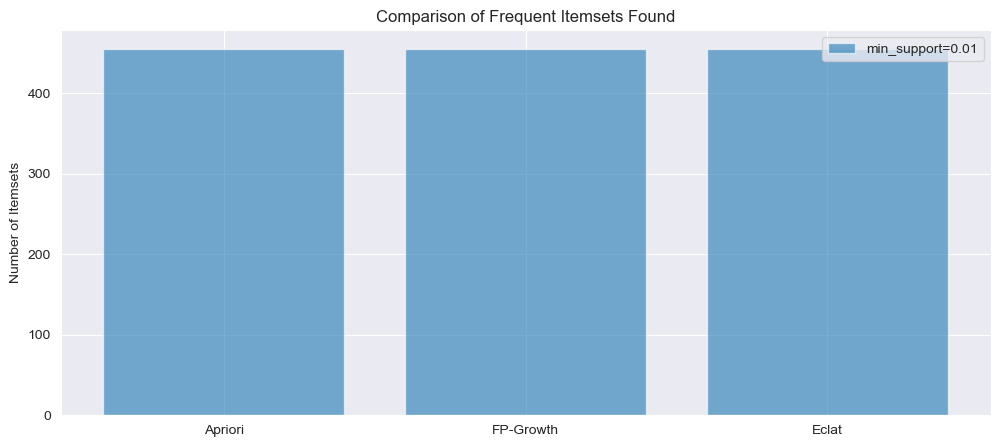

In [15]:
plt.figure(figsize=(12, 5))
for i, min_support in enumerate(min_support_values):
    counts = [len(results[min_support]["Apriori"]["itemsets"]),
              len(results[min_support]["FP-Growth"]["itemsets"]),
              len(results[min_support]["Eclat"]["itemsets"])]

    plt.bar(["Apriori", "FP-Growth", "Eclat"], counts, alpha=0.6, label=f"min_support={min_support}")

plt.title("Comparison of Frequent Itemsets Found")
plt.ylabel("Number of Itemsets")
plt.legend()
plt.show()

# Compare Execution Time

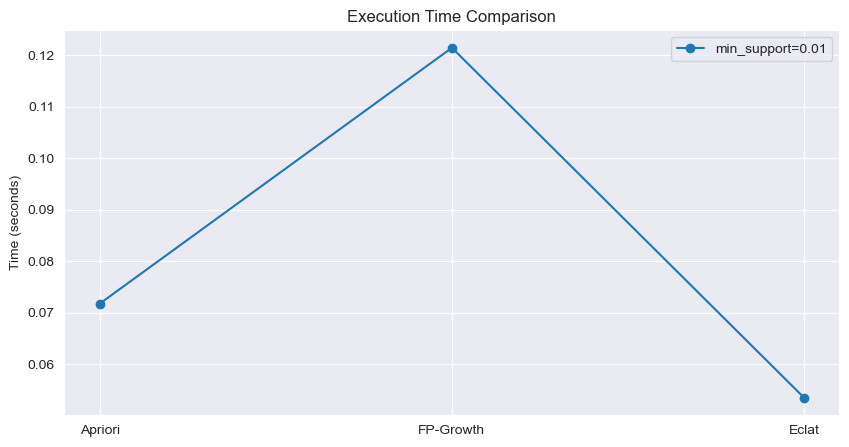

In [16]:
plt.figure(figsize=(10, 5))
for min_support in min_support_values:
    times = [results[min_support]["Apriori"]["time"],
             results[min_support]["FP-Growth"]["time"],
             results[min_support]["Eclat"]["time"]]
    plt.plot(["Apriori", "FP-Growth", "Eclat"], times, marker='o', label=f"min_support={min_support}")

plt.title("Execution Time Comparison")
plt.ylabel("Time (seconds)")
plt.legend()
plt.show()

# Scatter Plot (Support vs Confidence vs Lift)

KeyError: 0.04

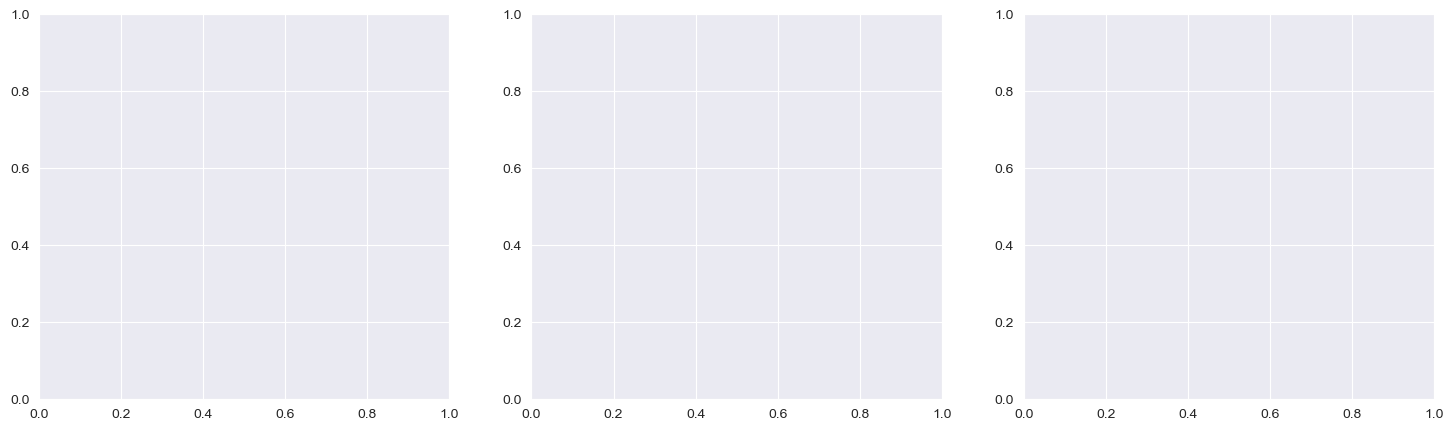

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (algo, color) in enumerate(zip(["Apriori", "FP-Growth", "Eclat"], ["blue", "red", "green"])):
    rules = results[0.04][algo]["rules"]  # Pick min_support=0.05 for fair comparison
    axes[i].scatter(rules["support"], rules["confidence"], c=rules["lift"], cmap="coolwarm", alpha=0.7)
    axes[i].set_title(f"{algo} Rules")
    axes[i].set_xlabel("Support")
    axes[i].set_ylabel("Confidence")
    axes[i].grid(True)

plt.show()

# Association Rule Networks (Side-by-Side)

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, algo in enumerate(["Apriori", "FP-Growth", "Eclat"]):
    rules = results[0.04][algo]["rules"]  # Pick min_support=0.05

    G = nx.DiGraph()
    for _, row in rules.iterrows():
        G.add_edge(tuple(row["antecedents"]), tuple(row["consequents"]), weight=row["confidence"])

    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, font_size=10, node_size=2000, ax=axes[i])
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): round(d["weight"], 2) for u, v, d in G.edges(data=True)},
                                 font_size=8, ax=axes[i])
    axes[i].set_title(f"{algo} Rule Network")

plt.show()